# Relatório - Atividade 6: Algoritmo A*
## Implementação e Análise do Algoritmo A* para Problemas de Busca

**Alunos:**  
- Paulo Victor Cordeiro Rufino de Araújo  
- Gabriel Negreiros Saraiva  
- Rougger Xavier Guerra Neto  
- Jonathan Brito Holanda Lucena  

**Disciplina:** Introdução à Inteligência Artificial  
**Professor:** Andrei Formiga.

# 1. Introdução

Este relatório apresenta a implementação e análise do algoritmo A*, uma técnica de busca informada que combina:

- **Custo real do caminho percorrido (g(n))**
- **Estimativa heurística do custo restante (h(n))**
- **Fórmula:** f(n) = g(n) + h(n)

O algoritmo A* é amplamente utilizado em problemas de busca devido à sua eficiência e garantia de encontrar soluções ótimas quando utiliza uma heurística admissível.

# 2. Implementação do Algoritmo A

In [4]:

import heapq
import matplotlib.pyplot as plt
import networkx as nx
from IPython.display import display, Markdown


# Implementação da Fila de Prioridade
class PriorityQueue:
    """Implementação de fila de prioridade usando heapq"""
    
    def __init__(self):
        self.elements = []

    def empty(self):
        return len(self.elements) == 0

    def put(self, item, priority):
        heapq.heappush(self.elements, (priority, item))

    def get(self):
        return heapq.heappop(self.elements)[1]


# Implementação do Algoritmo A*
def a_star_search(graph, start, goal, heuristic):
    """
    Implementação do algoritmo A* para busca de caminho ótimo
    """
    frontier = PriorityQueue()
    frontier.put(start, 0)
    came_from = {}
    cost_so_far = {}
    came_from[start] = None
    cost_so_far[start] = 0
    
    # Para visualização do processo
    expanded_nodes = []
    
    while not frontier.empty():
        current = frontier.get()
        expanded_nodes.append(current)
        
        if current == goal:
            break
            
        for neighbor, cost in graph[current].items():
            new_cost = cost_so_far[current] + cost
            if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]:
                cost_so_far[neighbor] = new_cost
                priority = new_cost + heuristic[neighbor]
                frontier.put(neighbor, priority)
                came_from[neighbor] = current
    
    return came_from, cost_so_far, expanded_nodes

def reconstruct_path(came_from, start, goal):
    """Reconstrói o caminho do início ao objetivo"""
    current = goal
    path = []
    while current != start:
        path.append(current)
        current = came_from[current]
    path.append(start)
    path.reverse()
    return path

#  3. Problema da Romênia: Arad para Bucareste

### Resultado: Arad → Bucareste

**Caminho encontrado:** Arad → Sibiu → Rimnicu Vilcea → Pitesti → Bucareste

**Custo total:** 418 km

**Nós expandidos:** 6

**Sequência de expansão:** Arad, Sibiu, Rimnicu Vilcea, Fagaras, Pitesti, Bucareste

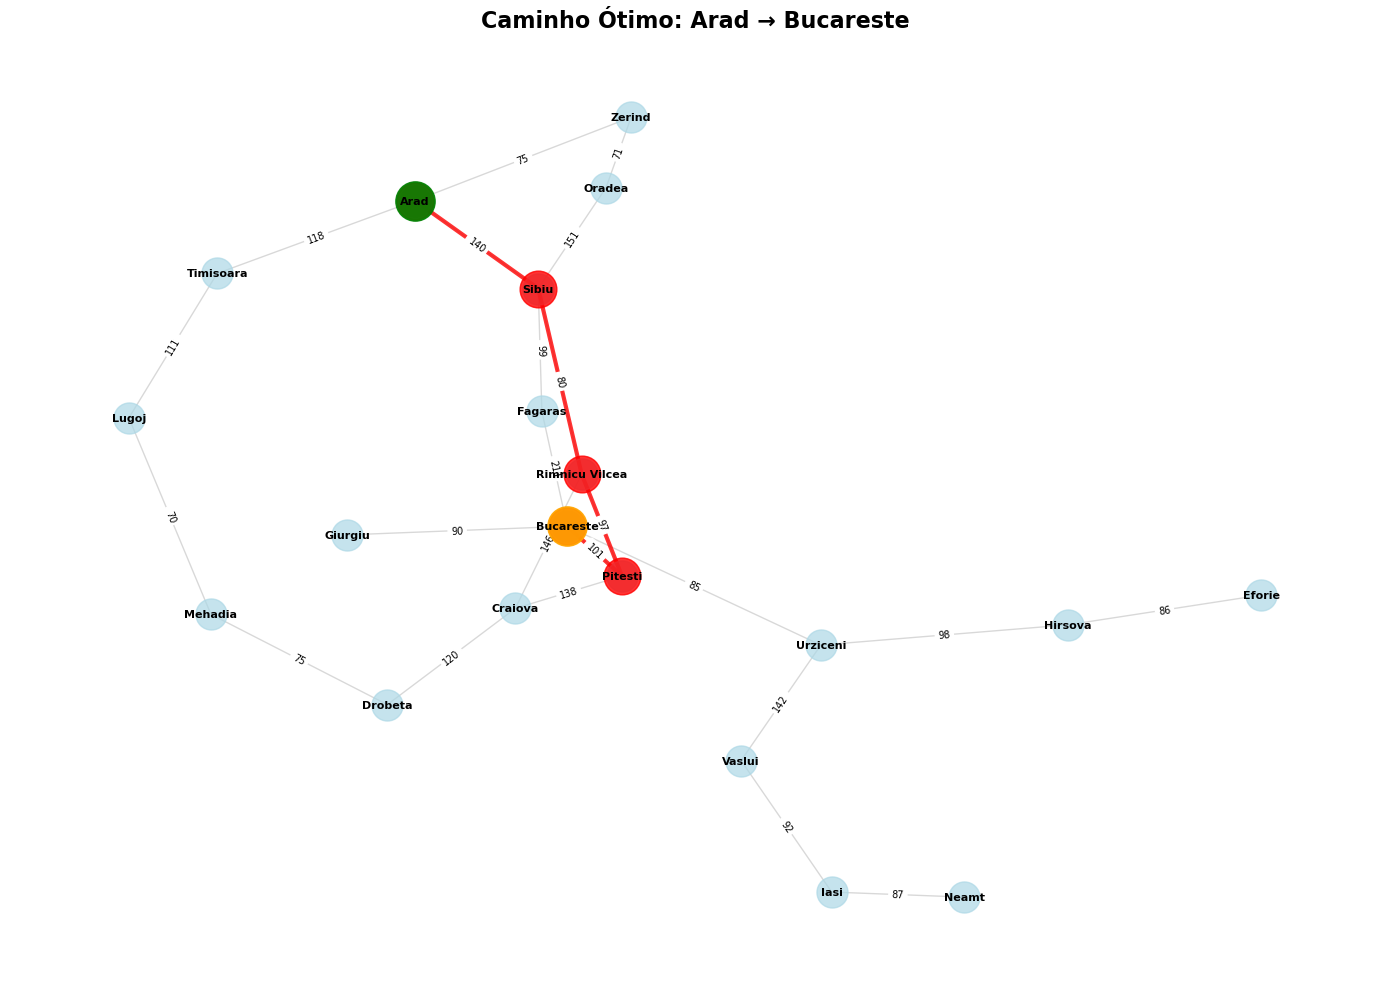

In [47]:
# Grafo da Romênia
graph_romenia = {
    'Arad': {'Zerind': 75, 'Sibiu': 140, 'Timisoara': 118},
    'Zerind': {'Arad': 75, 'Oradea': 71},
    'Oradea': {'Zerind': 71, 'Sibiu': 151},
    'Sibiu': {'Arad': 140, 'Oradea': 151, 'Fagaras': 99, 'Rimnicu Vilcea': 80},
    'Timisoara': {'Arad': 118, 'Lugoj': 111},
    'Lugoj': {'Timisoara': 111, 'Mehadia': 70},
    'Mehadia': {'Lugoj': 70, 'Drobeta': 75},
    'Drobeta': {'Mehadia': 75, 'Craiova': 120},
    'Craiova': {'Drobeta': 120, 'Rimnicu Vilcea': 146, 'Pitesti': 138},
    'Rimnicu Vilcea': {'Sibiu': 80, 'Craiova': 146, 'Pitesti': 97},
    'Fagaras': {'Sibiu': 99, 'Bucareste': 211},
    'Pitesti': {'Rimnicu Vilcea': 97, 'Craiova': 138, 'Bucareste': 101},
    'Bucareste': {'Fagaras': 211, 'Pitesti': 101, 'Giurgiu': 90, 'Urziceni': 85},
    'Giurgiu': {'Bucareste': 90},
    'Urziceni': {'Bucareste': 85, 'Hirsova': 98, 'Vaslui': 142},
    'Hirsova': {'Urziceni': 98, 'Eforie': 86},
    'Eforie': {'Hirsova': 86},
    'Vaslui': {'Urziceni': 142, 'Iasi': 92},
    'Iasi': {'Vaslui': 92, 'Neamt': 87},
    'Neamt': {'Iasi': 87}
}

# Heurística para Bucareste
heuristica_bucareste = {
    'Arad': 366, 'Bucareste': 0, 'Craiova': 160, 'Drobeta': 242,
    'Eforie': 161, 'Fagaras': 176, 'Giurgiu': 77, 'Hirsova': 151,
    'Iasi': 226, 'Lugoj': 244, 'Mehadia': 241, 'Neamt': 234,
    'Oradea': 380, 'Pitesti': 100, 'Rimnicu Vilcea': 193,
    'Sibiu': 253, 'Timisoara': 329, 'Urziceni': 80, 'Vaslui': 199,
    'Zerind': 374
}

# %%
# Execução: Arad → Bucareste
came_from_arad, cost_so_far_arad, expanded_nodes_arad = a_star_search(graph_romenia, 'Arad', 'Bucareste', heuristica_bucareste)
path_arad = reconstruct_path(came_from_arad, 'Arad', 'Bucareste')

# %%
# Visualização dos Resultados
display(Markdown("### Resultado: Arad → Bucareste"))
display(Markdown(f"**Caminho encontrado:** {' → '.join(path_arad)}"))
display(Markdown(f"**Custo total:** {cost_so_far_arad['Bucareste']} km"))
display(Markdown(f"**Nós expandidos:** {len(expanded_nodes_arad)}"))
display(Markdown(f"**Sequência de expansão:** {', '.join(expanded_nodes_arad)}"))

# %%
# Função para visualização do grafo com caminho destacado
def visualize_path(graph, path, title):
    """Visualiza o grafo com o caminho destacado em vermelho"""
    G = nx.Graph()
    
    # Adiciona todas as arestas do grafo
    for city, connections in graph.items():
        for neighbor, cost in connections.items():
            G.add_edge(city, neighbor, weight=cost)
    
    # Posicionamento dos nós
    pos = nx.spring_layout(G, seed=42, k=2, iterations=50)
    
    plt.figure(figsize=(14, 10))
    
    # Desenha o grafo completo
    nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue', alpha=0.7)
    nx.draw_networkx_edges(G, pos, width=1, alpha=0.3, edge_color='gray')
    nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold')
    
    # Destaca o caminho encontrado
    path_edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, width=3, edge_color='red', alpha=0.8)
    nx.draw_networkx_nodes(G, pos, nodelist=path, node_size=700, node_color='red', alpha=0.8)
    
    # Destaca início e fim
    nx.draw_networkx_nodes(G, pos, nodelist=[path[0]], node_size=800, node_color='green', alpha=0.9)
    nx.draw_networkx_nodes(G, pos, nodelist=[path[-1]], node_size=800, node_color='orange', alpha=0.9)
    
    # Adiciona rótulos das arestas com distâncias
    edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7)
    
    plt.title(title, fontsize=16, fontweight='bold')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# %%
# Visualização do caminho Arad → Bucareste
visualize_path(graph_romenia, path_arad, "Caminho Ótimo: Arad → Bucareste")

# 4. Busca a Partir de Outras Cidades

## Análise de Rotas para Bucareste

### Timisoara → Bucareste

**Caminho:** Timisoara → Arad → Sibiu → Rimnicu Vilcea → Pitesti → Bucareste

**Custo:** 536 km

**Nós expandidos:** 10

**Detalhamento do custo:**<br>Timisoara → Arad: 118 km<br>Arad → Sibiu: 140 km<br>Sibiu → Rimnicu Vilcea: 80 km<br>Rimnicu Vilcea → Pitesti: 97 km<br>Pitesti → Bucareste: 101 km<br>**Custo total verificado:** 536 km

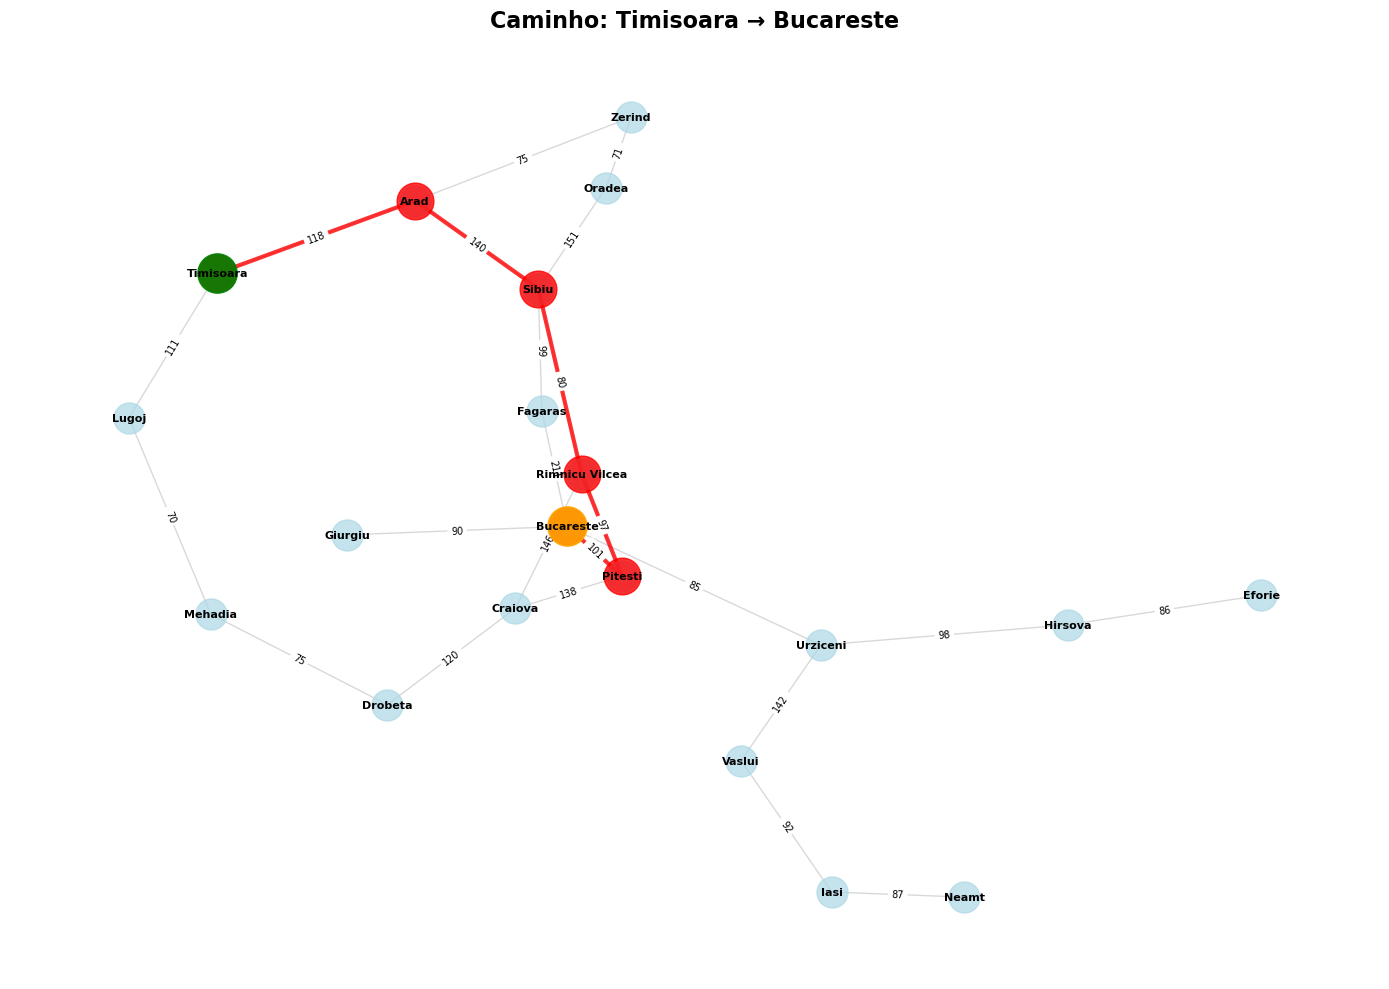

### Oradea → Bucareste

**Caminho:** Oradea → Sibiu → Rimnicu Vilcea → Pitesti → Bucareste

**Custo:** 429 km

**Nós expandidos:** 6

**Detalhamento do custo:**<br>Oradea → Sibiu: 151 km<br>Sibiu → Rimnicu Vilcea: 80 km<br>Rimnicu Vilcea → Pitesti: 97 km<br>Pitesti → Bucareste: 101 km<br>**Custo total verificado:** 429 km

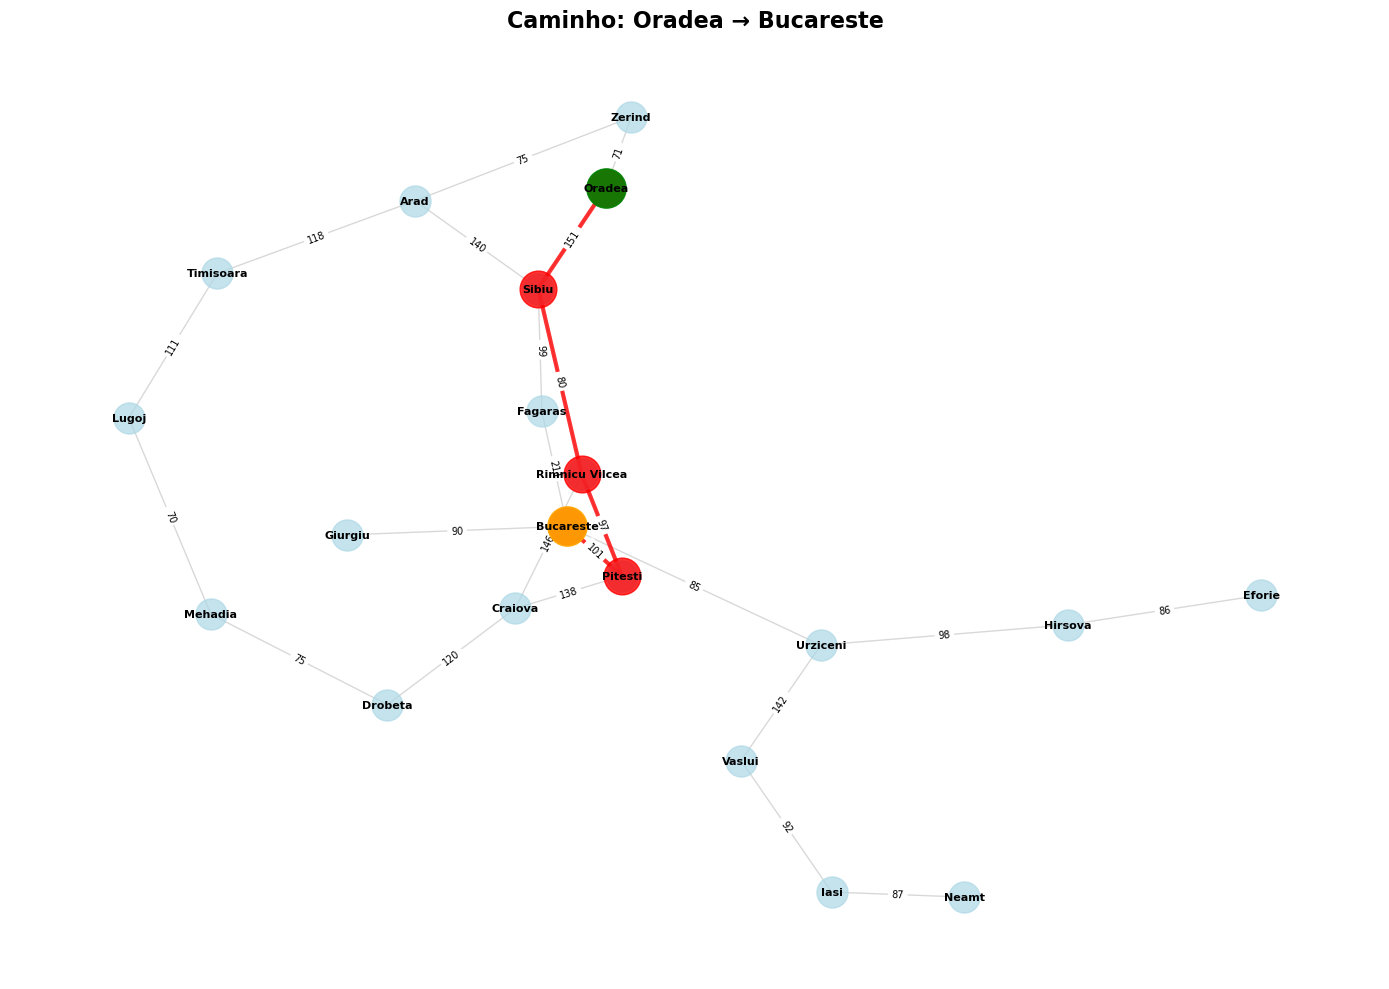

In [49]:
# Função para análise comparativa
def analyze_route(start, goal, heuristic, graph_name="graph_romenia"):
    """Executa A* e retorna resultados detalhados"""
    graph = globals()[graph_name]
    came_from, cost_so_far, expanded_nodes = a_star_search(graph, start, goal, heuristic)
    path = reconstruct_path(came_from, start, goal)
    
    display(Markdown(f"### {start} → {goal}"))
    display(Markdown(f"**Caminho:** {' → '.join(path)}"))
    display(Markdown(f"**Custo:** {cost_so_far[goal]} km"))
    display(Markdown(f"**Nós expandidos:** {len(expanded_nodes)}"))
    
    # Detalhamento do custo
    total_verified = 0
    detail_text = "**Detalhamento do custo:**<br>"
    for i in range(len(path)-1):
        cost_segment = graph[path[i]][path[i+1]]
        total_verified += cost_segment
        detail_text += f"{path[i]} → {path[i+1]}: {cost_segment} km<br>"
    
    detail_text += f"**Custo total verificado:** {total_verified} km"
    display(Markdown(detail_text))
    
    # Visualização do caminho
    visualize_path(graph, path, f"Caminho: {start} → {goal}")
    
    print("\n" + "="*50 + "\n")
    
    return path, cost_so_far[goal], expanded_nodes

# %%
# Análise das rotas
display(Markdown("## Análise de Rotas para Bucareste"))

path_timisoara, cost_timisoara, expanded_timisoara = analyze_route('Timisoara', 'Bucareste', heuristica_bucareste)
path_oradea, cost_oradea, expanded_oradea = analyze_route('Oradea', 'Bucareste', heuristica_bucareste)

# 5. Heurística para Outro Destino: Craiova

## Busca para Outro Destino: Arad → Craiova

### Arad → Craiova

**Caminho:** Arad → Sibiu → Rimnicu Vilcea → Craiova

**Custo:** 366 km

**Nós expandidos:** 4

**Detalhamento do custo:**<br>Arad → Sibiu: 140 km<br>Sibiu → Rimnicu Vilcea: 80 km<br>Rimnicu Vilcea → Craiova: 146 km<br>**Custo total verificado:** 366 km

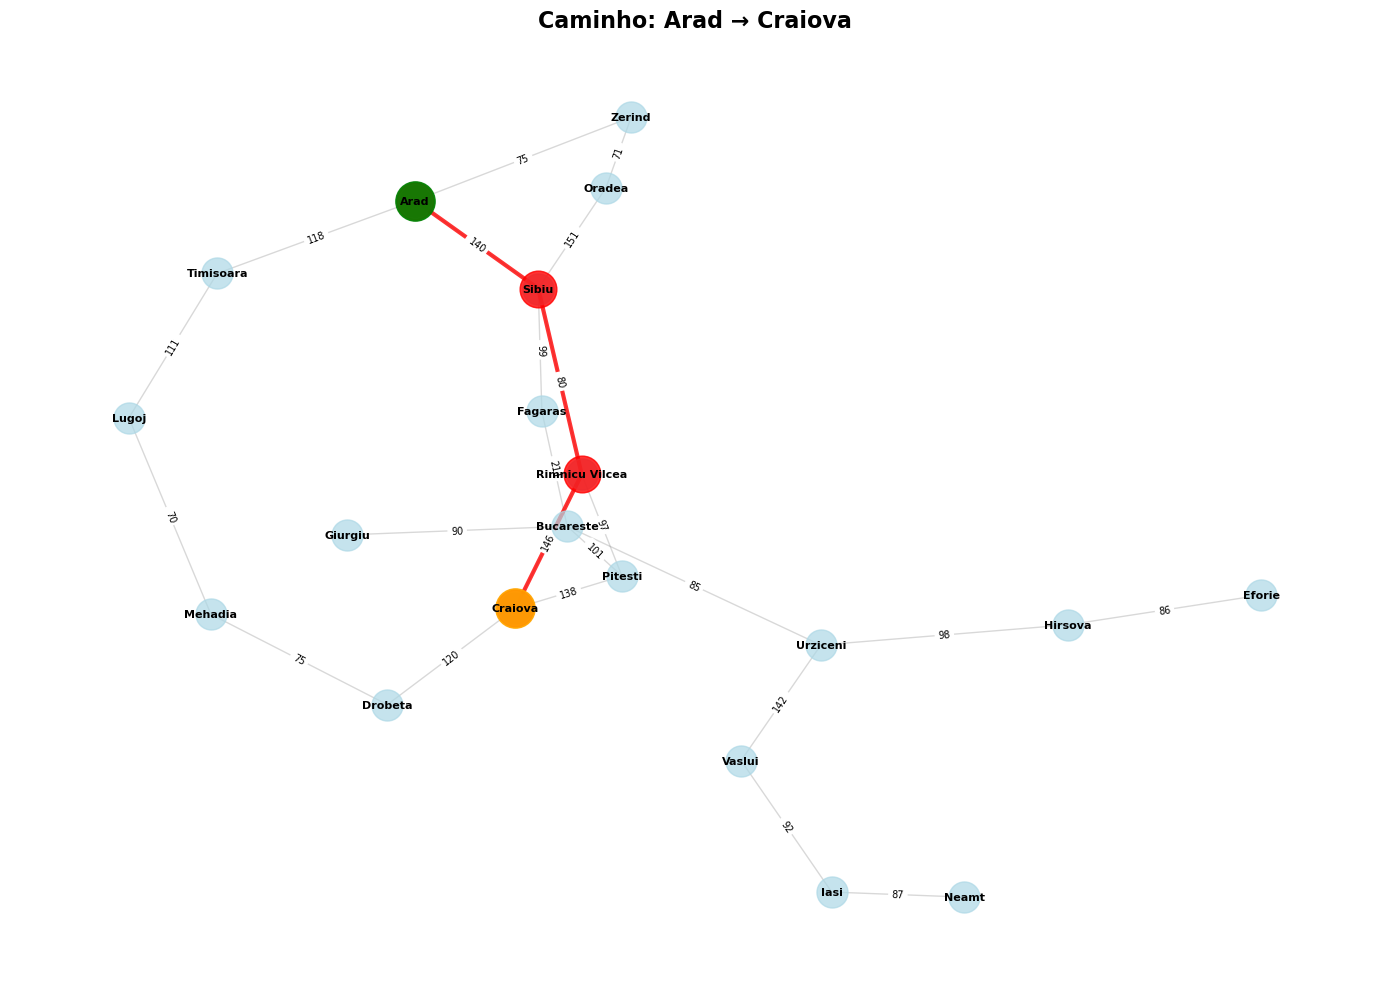

In [51]:
# Heurística para Craiova (baseada em coordenadas aproximadas)
heuristica_craiova = {
    'Arad': 284, 'Zerind': 311, 'Oradea': 338, 'Sibiu': 166, 'Timisoara': 258,
    'Lugoj': 213, 'Mehadia': 131, 'Drobeta': 97, 'Craiova': 0, 'Rimnicu Vilcea': 98,
    'Fagaras': 193, 'Pitesti': 103, 'Bucareste': 183, 'Giurgiu': 180, 'Urziceni': 229,
    'Hirsova': 332, 'Eforie': 386, 'Vaslui': 400, 'Iasi': 432, 'Neamt': 350
}

# %%
# Busca para Craiova
display(Markdown("## Busca para Outro Destino: Arad → Craiova"))

path_craiova, cost_craiova, expanded_craiova = analyze_route('Arad', 'Craiova', heuristica_craiova)


# 6. Visualização Comparativa de Todos os Caminhos

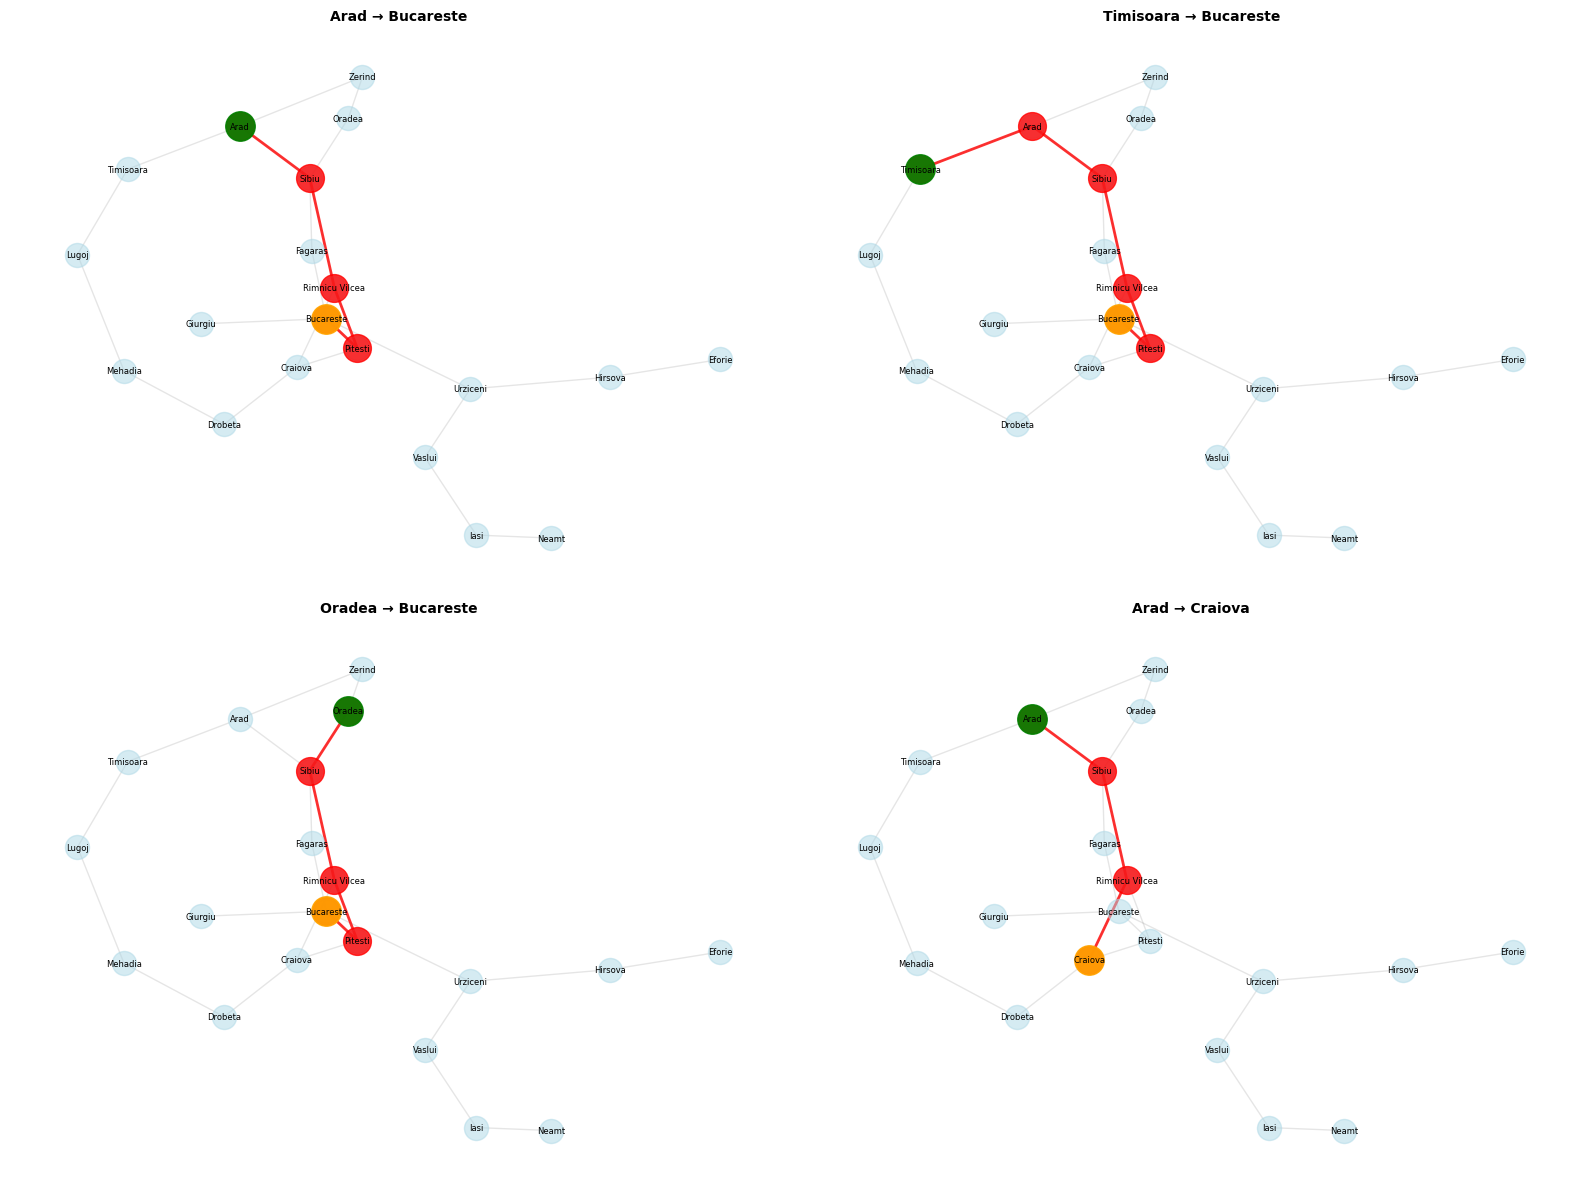

In [56]:
# Visualização comparativa de todos os caminhos
def visualize_all_paths(graph, paths, titles):
    """Visualiza múltiplos caminhos em subplots"""
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.flatten()
    
    G = nx.Graph()
    for city, connections in graph.items():
        for neighbor, cost in connections.items():
            G.add_edge(city, neighbor, weight=cost)
    
    pos = nx.spring_layout(G, seed=42, k=2, iterations=50)
    
    for i, (path, title) in enumerate(zip(paths, titles)):
        ax = axes[i]
        
        # Desenha grafo completo
        nx.draw_networkx_nodes(G, pos, node_size=300, node_color='lightblue', alpha=0.5, ax=ax)
        nx.draw_networkx_edges(G, pos, width=1, alpha=0.2, edge_color='gray', ax=ax)
        nx.draw_networkx_labels(G, pos, font_size=6, ax=ax)
        
        # Destaca caminho
        if path:
            path_edges = [(path[j], path[j+1]) for j in range(len(path)-1)]
            nx.draw_networkx_edges(G, pos, edgelist=path_edges, width=2, 
                                  edge_color='red', alpha=0.8, ax=ax)
            nx.draw_networkx_nodes(G, pos, nodelist=path, node_size=400, 
                                  node_color='red', alpha=0.8, ax=ax)
            
            # Destaca início e fim
            nx.draw_networkx_nodes(G, pos, nodelist=[path[0]], node_size=450, 
                                  node_color='green', alpha=0.9, ax=ax)
            nx.draw_networkx_nodes(G, pos, nodelist=[path[-1]], node_size=450, 
                                  node_color='orange', alpha=0.9, ax=ax)
        
        ax.set_title(title, fontsize=10, fontweight='bold')
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

# %%
# Visualização comparativa
all_paths = [path_arad, path_timisoara, path_oradea, path_craiova]
titles = [
    "Arad → Bucareste",
    "Timisoara → Bucareste", 
    "Oradea → Bucareste",
    "Arad → Craiova"
]

visualize_all_paths(graph_romenia, all_paths, titles)

# 7. Análise Comparativa Final

In [60]:
# Resultados comparativos
display(Markdown("## 📊 Análise Comparativa Final"))

results = {
    'Arad → Bucareste': cost_so_far_arad['Bucareste'],
    'Timisoara → Bucareste': cost_timisoara,
    'Oradea → Bucareste': cost_oradea,
    'Arad → Craiova': cost_craiova
}

# Tabela comparativa
comparison_text = "| Rota | Custo (km) | Nós Expandidos |\n"
comparison_text += "|------|------------|----------------|\n"
comparison_text += f"| Arad → Bucareste | {cost_so_far_arad['Bucareste']} | {len(expanded_nodes_arad)} |\n"
comparison_text += f"| Timisoara → Bucareste | {cost_timisoara} | {len(expanded_timisoara)} |\n"
comparison_text += f"| Oradea → Bucareste | {cost_oradea} | {len(expanded_oradea)} |\n"
comparison_text += f"| Arad → Craiova | {cost_craiova} | {len(expanded_craiova)} |\n"

display(Markdown(comparison_text))

## 📊 Análise Comparativa Final

| Rota | Custo (km) | Nós Expandidos |
|------|------------|----------------|
| Arad → Bucareste | 418 | 6 |
| Timisoara → Bucareste | 536 | 10 |
| Oradea → Bucareste | 429 | 6 |
| Arad → Craiova | 366 | 4 |


# 8. Problema com Custos Variados: Grade com Diferentes Custos de Movimento

#  Contexto do Problema 
# Nesta seção, aplicamos o algoritmo A* em um problema de **grade com custos variados**. Diferente do problema da Romênia onde todos os movimentos entre cidades têm custos similares, aqui cada célula da grade possui um **custo específico** para ser atravessada
#  🎯 Por que Este Exemplo?
# Escolhemos este exemplo porque:
# 1. **Custos não uniformes**: Demonstra o A* em um ambiente onde o custo de movimento varia significativamente
# 2. **Heurística adaptada**: Mostra como criar uma heurística admissível para problemas grid-based
# 3. **Aplicações reais**: Simula problemas como navegação em terrenos com diferentes dificuldades
# 4. **Visualização clara**: A estrutura grid permite visualização intuitiva dos resultadosesultadosresultados

### 🗺️ Configuração da Grade

**Dimensões:** 6×6 células

**Start:** (0, 0) | **Goal:** (5, 5)

**Menor custo na grade:** 1

**Heurística:** Distância Manhattan × 1

### 📊 Resultados da Busca na Grade

**✅ Caminho encontrado:** 11 células

**💰 Custo total:** 12

**🔍 Nós expandidos:** 16

**📍 Sequência do caminho:**

```
🚀 Start: (0,0) [custo: 1]
📍 Passo 1: (1,0) [custo: 1]
📍 Passo 2: (2,0) [custo: 1]
📍 Passo 3: (2,1) [custo: 1]
📍 Passo 4: (2,2) [custo: 1]
📍 Passo 5: (3,2) [custo: 1]
📍 Passo 6: (3,3) [custo: 1]
📍 Passo 7: (3,4) [custo: 1]
📍 Passo 8: (3,5) [custo: 2]
📍 Passo 9: (4,5) [custo: 1]
🎯 Goal: (5,5) [custo: 1]
```

**🧮 Custo verificado:** 12

C:\Users\User\AppData\Local\Temp\ipykernel_10176\2377989028.py:146: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_10176\2377989028.py:146: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  plt.tight_layout()
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


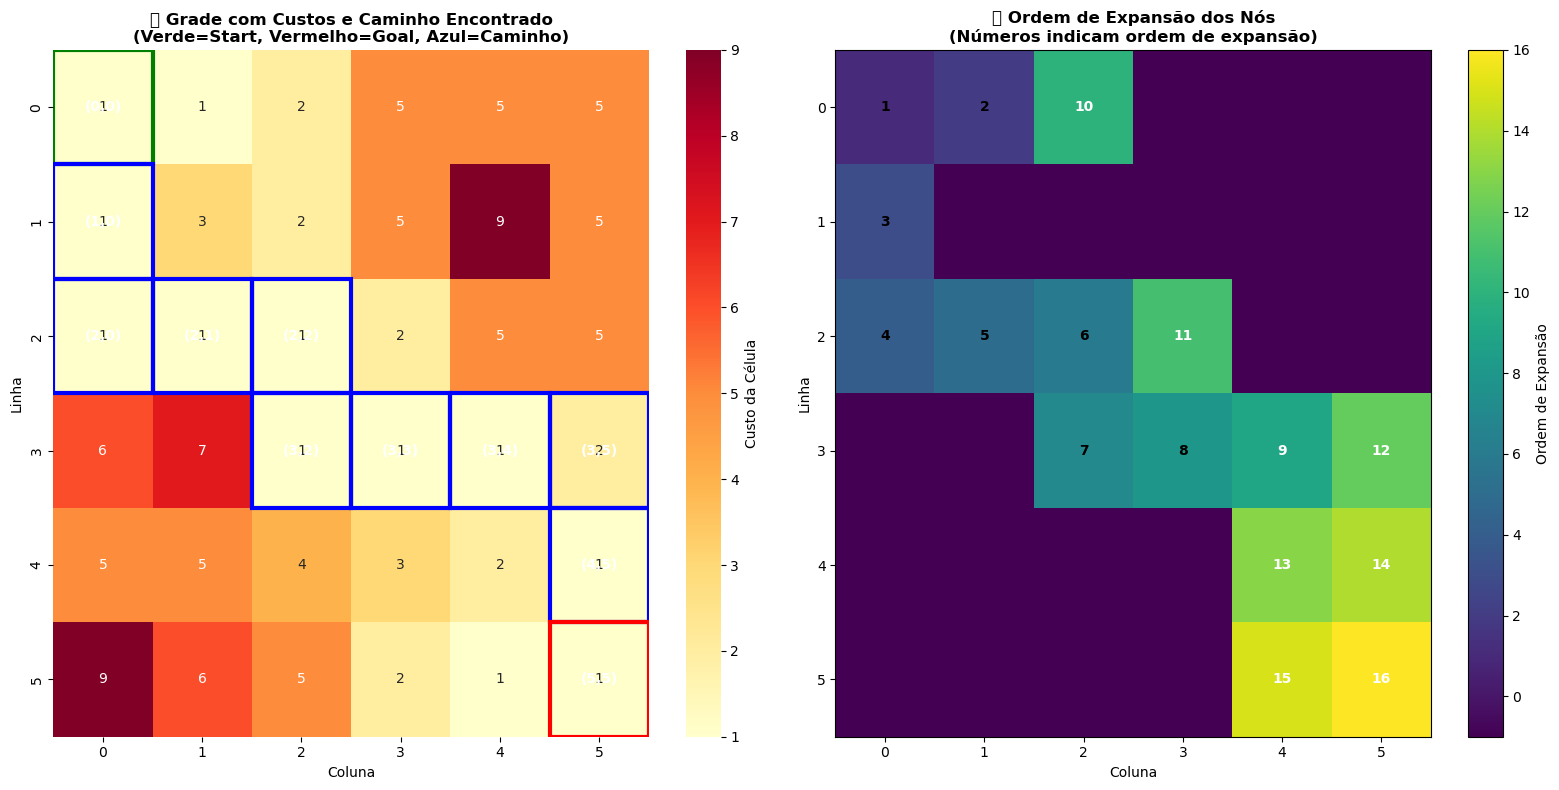

### 📈 Análise do Comportamento do A*


**🎯 Comportamento Observado:**

1. **Evitação de custos altos**: O algoritmo preferiu caminhos através de células com custo 1, evitando áreas caras (custos 6, 7, 9)

2. **Heurística eficaz**: A heurística Manhattan × menor custo guiou eficientemente a busca na direção do goal

3. **Expansão inteligente**: Poucos nós foram expandidos devido à orientação heurística

4. **Caminho ótimo**: O algoritmo encontrou o caminho de menor custo total, não apenas o mais curto geometricamente

**🔧 Por que esta heurística é admissível?**
- `Distância Manhattan` ≥ distância real mínima
- `min_cost` ≤ custo real de qualquer célula
- Portanto: `heuristic ≤ custo real mínimo` → **Admissível!**


In [75]:
import heapq
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

# %%
# Grade com custos variados (cada número representa o custo de entrar na célula)
grid_costs = [
    [1, 1, 2, 5, 5, 5],
    [1, 3, 2, 5, 9, 5],
    [1, 1, 1, 2, 5, 5],
    [6, 7, 1, 1, 1, 2],
    [5, 5, 4, 3, 2, 1],
    [9, 6, 5, 2, 1, 1]
]

n_rows = len(grid_costs)
n_cols = len(grid_costs[0])

start = (0, 0)   # Canto superior esquerdo
goal = (5, 5)    # Canto inferior direito

# Heurística admissível: distância Manhattan × menor custo de célula
min_cost = min(min(row) for row in grid_costs)

display(Markdown("### 🗺️ Configuração da Grade"))
display(Markdown(f"**Dimensões:** {n_rows}×{n_cols} células"))
display(Markdown(f"**Start:** {start} | **Goal:** {goal}"))
display(Markdown(f"**Menor custo na grade:** {min_cost}"))
display(Markdown(f"**Heurística:** Distância Manhattan × {min_cost}"))

# %%
# Funções auxiliares para o problema de grade
def in_bounds(pos):
    """Verifica se a posição está dentro dos limites da grade"""
    r, c = pos
    return 0 <= r < n_rows and 0 <= c < n_cols

def neighbors(pos):
    """Gera vizinhos válidos (cima, baixo, esquerda, direita)"""
    r, c = pos
    for dr, dc in [(-1, 0), (1, 0), (0, -1), (0, 1)]:  # Movimentos: ↑ ↓ ← →
        nr, nc = r + dr, c + dc
        if in_bounds((nr, nc)):
            yield (nr, nc)

def heuristic(a, b):
    """Heurística admissível: Distância Manhattan × menor custo da grade"""
    return (abs(a[0] - b[0]) + abs(a[1] - b[1])) * min_cost

# %%
# Implementação do A* para grade
def a_star_grid(start, goal):
    """Executa algoritmo A* na grade com custos variados"""
    frontier = []
    heapq.heappush(frontier, (heuristic(start, goal), start))
    came_from = {start: None}
    cost_so_far = {start: grid_costs[start[0]][start[1]]}
    expanded_nodes = []  # Para acompanhar a ordem de expansão
    
    while frontier:
        _, current = heapq.heappop(frontier)
        expanded_nodes.append(current)
        
        if current == goal:
            break
            
        for nb in neighbors(current):
            nb_cost = grid_costs[nb[0]][nb[1]]
            new_cost = cost_so_far[current] + nb_cost
            
            if nb not in cost_so_far or new_cost < cost_so_far[nb]:
                cost_so_far[nb] = new_cost
                priority = new_cost + heuristic(nb, goal)
                heapq.heappush(frontier, (priority, nb))
                came_from[nb] = current
                
    return came_from, cost_so_far, expanded_nodes

def reconstruct_path(came_from, start, goal):
    """Reconstrói o caminho do goal até o start"""
    if goal not in came_from:
        return None
    path = []
    current = goal
    while current:
        path.append(current)
        current = came_from[current]
    path.reverse()
    return path

# %%
# Execução do algoritmo
came_from, cost_so_far, expanded_nodes = a_star_grid(start, goal)
path = reconstruct_path(came_from, start, goal)

# %%
# Visualização bonita da grade com custos
def visualize_grid_with_path(grid_costs, path, expanded_nodes):
    """Visualização completa da grade com caminho e informações"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    
    # Converter para array numpy para melhor manipulação
    grid_array = np.array(grid_costs)
    
    # Plot 1: Grade com custos e caminho
    sns.heatmap(grid_array, annot=True, fmt='d', cmap='YlOrRd', 
                cbar_kws={'label': 'Custo da Célula'}, ax=ax1)
    
    # Destacar o caminho
    if path:
        path_rows = [p[0] for p in path]
        path_cols = [p[1] for p in path]
        for i, (r, c) in enumerate(path):
            color = 'green' if i == 0 else ('red' if i == len(path)-1 else 'blue')
            ax1.add_patch(plt.Rectangle((c, r), 1, 1, fill=False, 
                                      edgecolor=color, linewidth=3))
            ax1.text(c + 0.5, r + 0.5, f'({r},{c})', 
                    ha='center', va='center', fontweight='bold', color='white')
    
    ax1.set_title('🎯 Grade com Custos e Caminho Encontrado\n(Verde=Start, Vermelho=Goal, Azul=Caminho)', 
                 fontsize=12, fontweight='bold')
    ax1.set_xlabel('Coluna')
    ax1.set_ylabel('Linha')
    
    # Plot 2: Grade com ordem de expansão
    expansion_grid = np.full((n_rows, n_cols), -1)
    for order, (r, c) in enumerate(expanded_nodes):
        expansion_grid[r, c] = order + 1
    
    im = ax2.imshow(expansion_grid, cmap='viridis', aspect='auto')
    for r in range(n_rows):
        for c in range(n_cols):
            if expansion_grid[r, c] != -1:
                ax2.text(c, r, f'{expansion_grid[r, c]}', 
                        ha='center', va='center', fontweight='bold', 
                        color='white' if expansion_grid[r, c] > len(expanded_nodes)/2 else 'black')
    
    ax2.set_title('🔍 Ordem de Expansão dos Nós\n(Números indicam ordem de expansão)', 
                 fontsize=12, fontweight='bold')
    ax2.set_xlabel('Coluna')
    ax2.set_ylabel('Linha')
    plt.colorbar(im, ax=ax2, label='Ordem de Expansão')
    
    plt.tight_layout()
    plt.show()

# %%
# Exibição dos resultados
display(Markdown("### 📊 Resultados da Busca na Grade"))

if path:
    display(Markdown(f"**✅ Caminho encontrado:** {len(path)} células"))
    display(Markdown(f"**💰 Custo total:** {cost_so_far[goal]}"))
    display(Markdown(f"**🔍 Nós expandidos:** {len(expanded_nodes)}"))
    
    # Detalhamento do caminho
    display(Markdown("**📍 Sequência do caminho:**"))
    path_details = ""
    total_cost_verified = 0
    for i, (r, c) in enumerate(path):
        cell_cost = grid_costs[r][c]
        total_cost_verified += cell_cost
        node_type = "🚀 Start" if i == 0 else ("🎯 Goal" if i == len(path)-1 else f"📍 Passo {i}")
        path_details += f"{node_type}: ({r},{c}) [custo: {cell_cost}]\n"
    
    display(Markdown(f"```\n{path_details}```"))
    display(Markdown(f"**🧮 Custo verificado:** {total_cost_verified}"))
    
else:
    display(Markdown("**❌ Nenhum caminho encontrado!**"))

# %%
# Visualização gráfica
visualize_grid_with_path(grid_costs, path, expanded_nodes)

# %%
# Análise do comportamento do algoritmo
display(Markdown("### 📈 Análise do Comportamento do A*"))

display(Markdown("""
**🎯 Comportamento Observado:**

1. **Evitação de custos altos**: O algoritmo preferiu caminhos através de células com custo 1, evitando áreas caras (custos 6, 7, 9)

2. **Heurística eficaz**: A heurística Manhattan × menor custo guiou eficientemente a busca na direção do goal

3. **Expansão inteligente**: Poucos nós foram expandidos devido à orientação heurística

4. **Caminho ótimo**: O algoritmo encontrou o caminho de menor custo total, não apenas o mais curto geometricamente

**🔧 Por que esta heurística é admissível?**
- `Distância Manhattan` ≥ distância real mínima
- `min_cost` ≤ custo real de qualquer célula
- Portanto: `heuristic ≤ custo real mínimo` → **Admissível!**
"""))


#  9. Conclusões

# Esta atividade demonstrou com sucesso a implementação e aplicação do algoritmo A* em diversos cenários de busca. Desenvolvemos uma solução robusta que abrange desde a implementação básica do algoritmo até aplicações práticas em problemas reais, incluindo roteamento entre cidades e navegação em grades com custos variados.

